# Homework Assignment Number One

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Section 1: Police killings

In [2]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- lawenforcementagency -> agency
- raceethnicity -> race

In [3]:
killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)
killings.columns

Index([u'name', u'age', u'gender', u'race', u'month', u'day', u'year',
       u'streetaddress', u'city', u'state', u'agency', u'cause', u'armed',
       u'county_income'],
      dtype='object')

### 2. Show the count of missing values in each column

In [4]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null value in the dataframe with the string "unknown"

In [5]:
killings.fillna("unknown", inplace=True)
(killings.streetaddress == "unknown").sum()

4

### 4. How many killings were there in March and April?

In [6]:
((killings.month == "March") | (killings.month =="April")).sum()
#210 killings

210

### 5. How many male and how many female victims are there?

In [12]:
killings.gender.value_counts()
#22 female victims
#445 male victims

Male      445
Female     22
Name: gender, dtype: int64

### 6. How many killings were of unarmed people?

In [8]:
killings.armed.unique()
(killings.armed=="No").sum()
#102 unarmed people

102

### 7. What percentage of all killings were unarmed?

In [9]:
(killings.armed=="No").value_counts(normalize=True)
#21.8% of killings were unarmed

False    0.781585
True     0.218415
Name: armed, dtype: float64

### 8. What are the 5 states with the most killings?

In [10]:
killings.state.value_counts(sort=True).head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

### 9. Show a value counts of deaths for each race

In [13]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

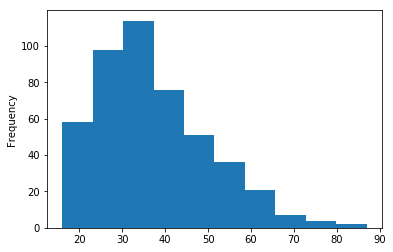

In [14]:
killings.age.plot(kind="hist")
plt.show()

### 11. Show histogram of ages for each race

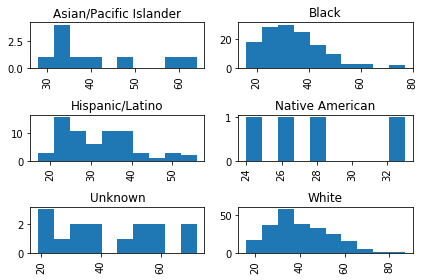

In [15]:
killings.hist(column="age", by="race")
plt.tight_layout()
plt.show()

### 12. What is the average age of death by race?

In [16]:
killings.groupby("race").age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

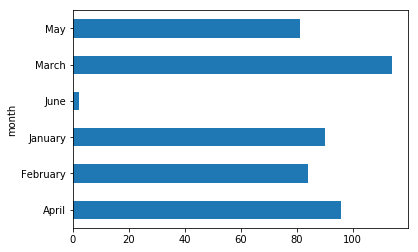

In [17]:
killings.groupby("month").count().age.plot(kind="barh")
plt.show()

## Section 2: College Majors

In [18]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()
#majors.set_index("Major")

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [19]:
lab={"Employed_full_time_year_round", "Major_code"}
majors.drop(labels=lab, axis=1, inplace=True)
majors.columns

Index([u'Major', u'Major_category', u'Total', u'Employed', u'Unemployed',
       u'Unemployment_rate', u'Median', u'P25th', u'P75th'],
      dtype='object')

### 2. Show the count of missing values in each column

In [20]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [21]:
majors.sort_values(by="Median", axis=0, ascending=False, inplace=True)
majors.head(10).Major

59                                 PETROLEUM ENGINEERING
154    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
57             NAVAL ARCHITECTURE AND MARINE ENGINEERING
55                             METALLURGICAL ENGINEERING
58                                   NUCLEAR ENGINEERING
56                        MINING AND MINERAL ENGINEERING
97                      MATHEMATICS AND COMPUTER SCIENCE
48                                ELECTRICAL ENGINEERING
45                                  CHEMICAL ENGINEERING
51                GEOLOGICAL AND GEOPHYSICAL ENGINEERING
Name: Major, dtype: object

### 4. Plot the data from the last question in a bar chart, include proper title, and labels


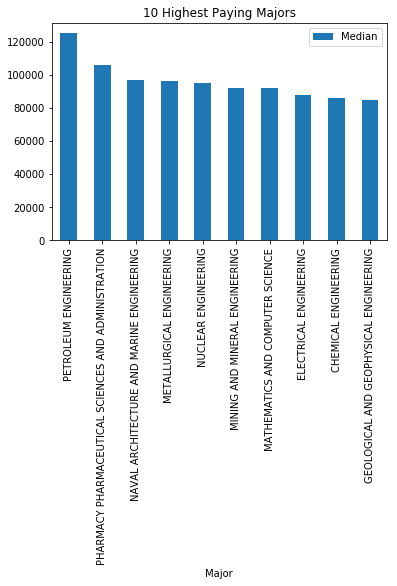

In [22]:
cols = ["Major", "Median"]
Q4 = majors[cols].head(10)
Q4.plot(kind="bar", x="Major", y="Median", title="10 Highest Paying Majors")
plt.show()

### 5. What is the average median salary for each major category?

In [23]:
majors.groupby("Major_category").mean().Median

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

### 6. Visualize only the top 5 paying major categories

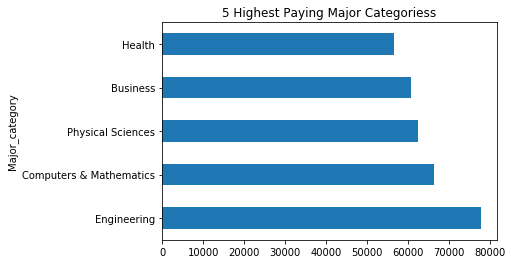

In [24]:
Q6 = majors.groupby("Major_category").mean().Median.sort_values(ascending=False).head(5)
Q6.plot(kind="barh", x="Major", y="Median", title="5 Highest Paying Major Categoriess")
plt.show()

### 7. Plot a histogram of the distribution of median salaries

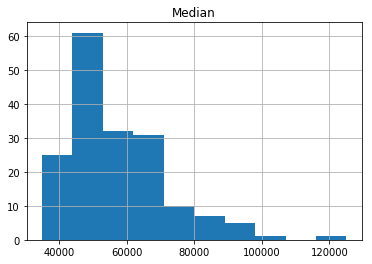

In [25]:
majors.hist("Median");

### 8. Plot a histogram of the distribution of median salaries by major category

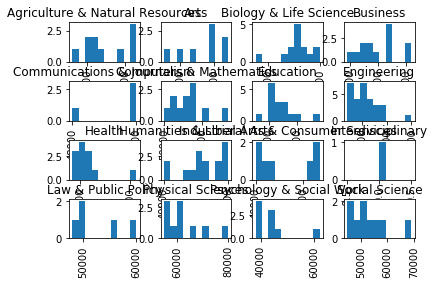

In [26]:
majors.hist("Median", by="Major_category");


### 9. What are the top 10 most UNemployed majors?

In [27]:
majors.sort_values(by="Unemployed", ascending=False, inplace=True)
majors.head(10).Major

161    BUSINESS MANAGEMENT AND ADMINISTRATION
158                          GENERAL BUSINESS
114                                PSYCHOLOGY
159                                ACCOUNTING
13                             COMMUNICATIONS
73            ENGLISH LANGUAGE AND LITERATURE
164          MARKETING AND MARKETING RESEARCH
132          POLITICAL SCIENCE AND GOVERNMENT
25                          GENERAL EDUCATION
78                                    BIOLOGY
Name: Major, dtype: object

### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [28]:
#majors.groupby("Major_category").mean().sort_values(by="Unemployment_rate", ascending=False).head(10)
majors.groupby("Major_category").mean().sort_values(by="Unemployed", ascending=False).head(10).index

Index([u'Business', u'Communications & Journalism', u'Social Science', u'Arts',
       u'Humanities & Liberal Arts', u'Psychology & Social Work',
       u'Law & Public Policy', u'Education', u'Computers & Mathematics',
       u'Health'],
      dtype='object', name=u'Major_category')

## Section 3: FIFA Soccer Game data

In [29]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [30]:
fifa.columns = fifa.columns.str.lower()
fifa.set_index("name")
dropcols={"national_position", "national_kit", "club_kit", "club_joining", "contract_expiry"}
fifa.drop(dropcols, axis=1, inplace=True)
fifa = fifa[(fifa.club_position != "GK")]
fifa.drop(fifa.columns[fifa.columns.str.startswith("gk")], axis=1, inplace=True)
fifa = fifa[(fifa.rating>69)]
fifa.height = fifa.height.str.replace(" cm", "")
fifa.weight = fifa.weight.str.replace(" cm", "")
fifa["height"] = fifa.height.astype(float)
fifa["weight"] = fifa.height.astype(float)
fifa.isnull().sum().sum()
fifa.dropna(inplace=True)

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [31]:
fifa.sort_values(by="speed", ascending=False).head(5).name

35      Pierre-Emerick Aubameyang
1461            Jonathan Biabiany
1748                Víctor Ibarbo
393                      Williams
5091                Ernest Asante
Name: name, dtype: object

In [32]:
fifa.sort_values(by="marking", ascending=False).head(5).name

27    Giorgio Chiellini
10       Jérôme Boateng
64      Andrea Barzagli
15         Thiago Silva
59              Miranda
Name: name, dtype: object

In [33]:
fifa.sort_values(by="finishing", ascending=False).head(5).name

1           Lionel Messi
3            Luis Suárez
0      Cristiano Ronaldo
14       Gonzalo Higuaín
6     Robert Lewandowski
Name: name, dtype: object

### 3. Who is the tallest French lefted foot player?

In [34]:
fifa[(fifa.preffered_foot=="Left") & (fifa.nationality=="France")].sort_values(by="height", ascending=False).head(1).name
#Romain Thomas

819    Romain Thomas
Name: name, dtype: object

### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [35]:
fifa.corr()["rating"]

rating                1.000000
height                0.031355
weight                0.031355
age                   0.043735
weak_foot             0.128486
skill_moves           0.197929
ball_control          0.324058
dribbling             0.247239
marking               0.067274
sliding_tackle        0.091544
standing_tackle       0.107487
aggression            0.156163
reactions             0.690226
attacking_position    0.220396
interceptions         0.126365
vision                0.306819
composure             0.436876
crossing              0.209043
short_pass            0.367006
long_pass             0.307635
acceleration          0.128840
speed                 0.130594
stamina               0.175219
strength              0.105597
balance               0.081555
agility               0.145819
jumping               0.107216
heading               0.173646
shot_power            0.248798
finishing             0.213504
long_shots            0.228673
curve                 0.241254
freekick

### 5. Make a heatmap of the dataset's correlation table

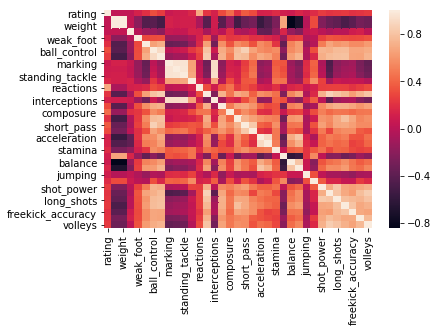

In [36]:
sns.heatmap(fifa.corr())

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [37]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [38]:
fifa2=fifa[fifa.club.isin(clubs_list)]
fifa2

,name,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,185.0,Right,02/05/1985,32,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,170.0,Left,06/24/1987,29,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,FC Barcelona,LW,92,174.0,174.0,Right,02/05/1992,25,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,182.0,Right,01/24/1987,30,...,86,69,77,87,94,86,86,84,85,88
6,Robert Lewandowski,Poland,FC Bayern,ST,90,185.0,185.0,Right,08/21/1988,28,...,78,84,85,86,91,82,77,76,81,86
7,Gareth Bale,Wales,Real Madrid,RW,90,183.0,183.0,Left,07/16/1989,27,...,77,85,86,91,87,90,86,85,76,76
8,Zlatan Ibrahimović,Sweden,Manchester Utd,ST,90,195.0,195.0,Right,10/03/1981,35,...,86,72,80,93,90,88,82,82,91,93
10,Jérôme Boateng,Germany,FC Bayern,Sub,89,192.0,192.0,Right,09/03/1988,28,...,58,75,86,79,34,58,56,31,46,53
11,Eden Hazard,Belgium,Chelsea,LW,89,173.0,173.0,Right,01/07/1991,26,...,92,59,57,79,81,82,82,79,86,79
12,Luka Modrić,Croatia,Real Madrid,RCM,89,174.0,174.0,Right,09/09/1985,31,...,93,67,55,73,71,82,79,77,80,74


### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

ValueError: could not convert string to float: curve

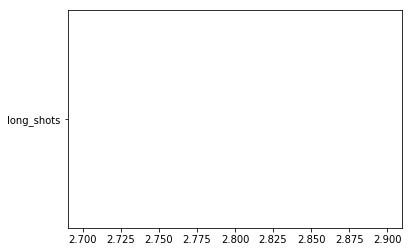

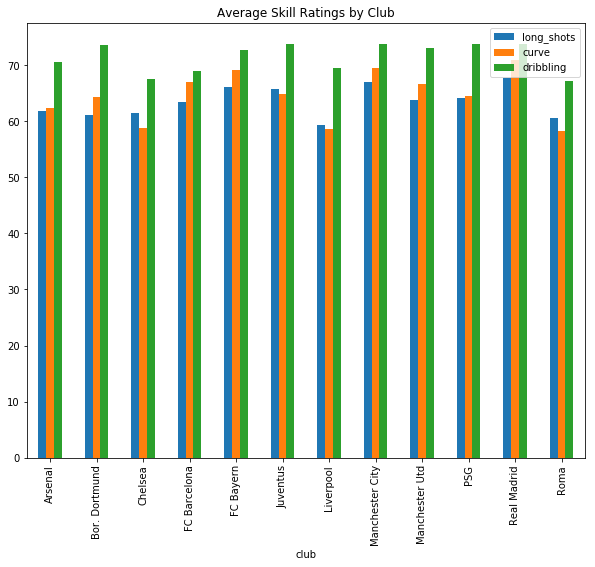

In [76]:
cols = ["long_shots", "curve", "dribbling"]
fifa2.groupby("club")[cols].mean().plot(kind="bar", figsize=(10,8), 
                                           title = "Average Skill Ratings by Club")
plt.show()

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

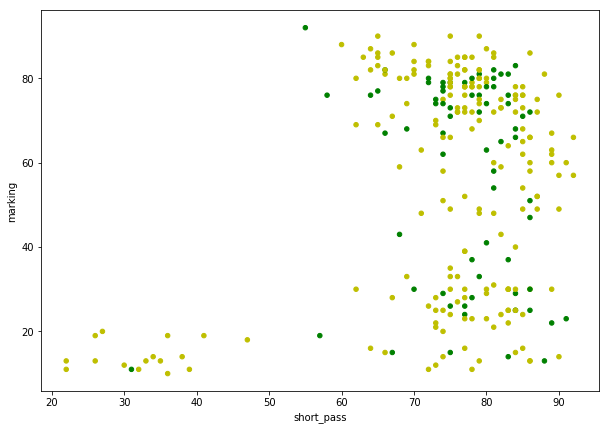

In [72]:
color_dict = {"Right":"y", "Left":"g"}

#Create new pandas series object which is the legendary column but with color-encoding
colors = fifa2.preffered_foot.map(color_dict)


#plt.scatter("short_pass", "marking", c=colors, data=fifa2);

fifa2.plot(x="short_pass", y = "marking", kind="scatter", c=colors, figsize=(10, 7), )
plt.show()

### 9. Make a grouped boxplots using club_position as the x axis for the following attributes: dribbling, balance, and sliding_tackle

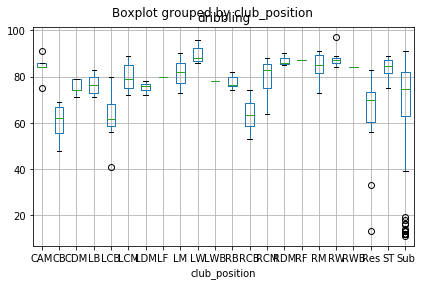

In [87]:
#Dribbling boxplot
#fifa2.groupby("club_position")["d"].mean().plot(kind="box", figsize=(10,8), 
#                                           title = "Average Skill Ratings by Club Position")
#plt.show()

plt.figure(figsize=(10, 8))
fifa2.boxplot(column="dribbling", by="club_position")
plt.tight_layout()
plt.show()

Which position is better at dribbling? ST or RCM? Why?

In [80]:
fifa2.groupby("club_position")["dribbling"].mean()
#ST > RCM Higher Average

club_position
CAM    84.000000
CB     60.250000
CDM    75.400000
LB     76.750000
LCB    62.166667
LCM    79.750000
LDM    75.333333
LF     80.000000
LM     81.666667
LW     89.500000
LWB    78.000000
RB     77.750000
RCB    63.333333
RCM    79.625000
RDM    87.000000
RF     87.000000
RM     84.166667
RW     87.875000
RWB    84.000000
Res    63.928571
ST     83.750000
Sub    67.044776
Name: dribbling, dtype: float64

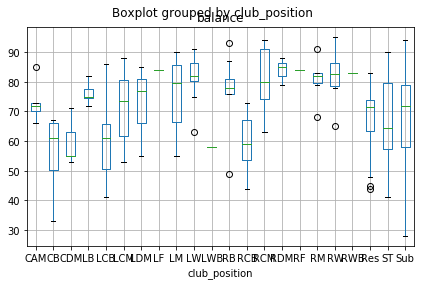

In [106]:
#Balance boxplot
plt.figure(figsize=(10, 8))
fifa2.boxplot(column="balance", by="club_position")
plt.tight_layout()
plt.show()

Which position is better at balance? LM or LDM? Why?

In [1]:
fifa2.groupby("club_position")["balance"].mean()
#LM > LDM Higher Average

NameError: name 'fifa2' is not defined

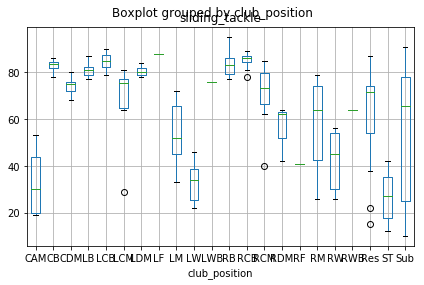

In [89]:
#sliding_tackle boxplot
plt.figure(figsize=(10, 8))
fifa2.boxplot(column="sliding_tackle", by="club_position")
plt.tight_layout()
plt.show()

What is the IQR for positions ST, RB, and RM?

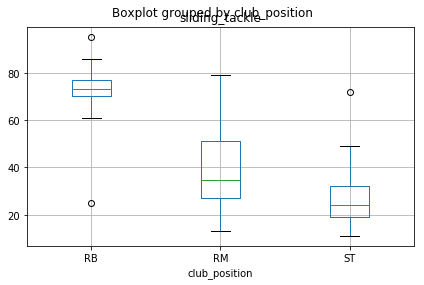

In [105]:
rows = {"ST","RB","RM"}
fifa3=fifa[fifa.club_position.isin(rows)]

plt.figure(figsize=(10, 8))
fifa3.boxplot(column="sliding_tackle", by="club_position")
plt.tight_layout()
plt.show()


#fifa2.groupby("club_position")["sliding_tackle"].median() + fifa2.groupby("club_position")["sliding_tackle"].std()

In [107]:
#RB: 77 - 72
#RM: 50 - 26
#ST: 30-19

club_position
CAM    30.0
CB     83.5
CDM    75.0
LB     81.0
LCB    85.0
LCM    75.5
LDM    80.0
LF     88.0
LM     52.0
LW     34.0
LWB    76.0
RB     83.0
RCB    86.0
RCM    73.5
RDM    62.0
RF     41.0
RM     64.0
RW     45.0
RWB    64.0
Res    71.5
ST     27.0
Sub    65.5
Name: sliding_tackle, dtype: float64

In [1]:
#possible alternative to eyeballing boxplot
fifa3["sliding tackle"].quantile(.75) - fifa3["sliding tackle"].quantile(.25) - 

NameError: name 'fifa3' is not defined